# Imports

In [1]:
import matplotlib.pyplot as plt
import random

# Genetic Algorithm

This was in a context of lot sizing problems

In [2]:
improvements = []

def decode_solution(len_demands, individual):
    inv = [0] * (len_demands + 1)  
    prod = [0] * len_demands
    total_cost = 0
    
    # Descobre o periodo i de produção e o próximo periodo k de produção
    for i in range(len_demands):
        if individual[i] == 1:
            next_setup = len_demands
            for k in range(i + 1, len_demands):
                if individual[k] == 1:
                    next_setup = k
                    break
            

            # Defini qual a máxima distancia possivel antes que atinja o máximo do invetário
            # Se esse loop quebra antes, e ele acaba não conseguindo ter inventario para tudo que foi produzido, no final dessa função isso é penalizado
            cumulative_after_i = 0
            max_j = i
            for j in range(i + 1, next_setup):
                cumulative_after_i += demands[j]
                if inv[i] + cumulative_after_i <= max_inventory:
                    max_j = j
                else:
                    break
            
            # Demanda total é a demanda do da posição + demanda de todas as posições possiveis aceitas pelo inventário
            total_demand = demands[i] + cumulative_after_i

            # Q é o máximo da produção naquele momento, que é a demanta total menos o inventário ( O TOTAL DA DEMANDA MENOS O TAMANHO DO INVENTÁRIO )
            Q = max(0, total_demand - inv[i])
            prod[i] = Q
            inv[i + 1] = inv[i] + Q - demands[i]
            total_cost += setup_cost[i]
        else:
            prod[i] = 0
            inv[i + 1] = inv[i] - demands[i]
            # se o inventário não for suficiente para a demanda, ela fica negativa e abaixo esse custo é cobrado
        
        if inv[i + 1] > 0:
            total_cost += holding_cost[i] * inv[i + 1]
        if inv[i + 1] < 0:
            total_cost += 1000000 * abs(inv[i + 1])
    
    return total_cost, prod, inv[1:]

def run_ga(demands, setup_cost, holding_cost, max_inventory, 
                pop_size=100, num_generations=100, tournament_size=5, 
                crossover_rate=0.8, mutation_rate=0.05):
    
    len_demands = len(demands)
    
    # Init population
    population = []
    for _ in range(pop_size):
        individual = [random.randint(0, 1) for _ in range(len_demands)]
        population.append(individual)
    
    best_individual = None
    best_fitness = float('inf')
    best_prod = None
    best_inv = None
    
    for gen in range(num_generations):
        fitnesses = []
        for individual in population:
            cost, _, _ = decode_solution(len_demands, individual)
            fitnesses.append(cost)
        
        # Avalia melhor solução
        min_fit = min(fitnesses)
        improvements.append(min_fit)
        min_idx = fitnesses.index(min_fit)
        if min_fit < best_fitness:
            best_fitness = min_fit
            best_individual = population[min_idx][:] # Pega todo o vetor do indivíduo
            best_cost, best_prod, best_inv = decode_solution(len_demands, best_individual)
        
        # Tournament
        new_population = []
        for _ in range(pop_size):
            # os pais podem se repetir já que pego 5 aleatorios dos 100, e depois escolho e melhor isso até gerar 100 individuos
            tournament = random.sample(range(pop_size), tournament_size)
            tour_fitnesses = [fitnesses[i] for i in tournament]
            winner_idx = tournament[tour_fitnesses.index(min(tour_fitnesses))]
            new_population.append(population[winner_idx][:])
        
        # Crossover
        random.shuffle(new_population)
        next_population = []
        i = 0
        while i < pop_size:
            if i + 1 < pop_size and random.random() < crossover_rate:
                crossover_point = random.randint(1, len_demands - 1)
                parent1 = new_population[i]
                parent2 = new_population[i + 1]
                child1 = parent1[:crossover_point] + parent2[crossover_point:]
                child2 = parent2[:crossover_point] + parent1[crossover_point:]
                next_population.append(child1)
                next_population.append(child2)
                i += 2
            else:
                next_population.append(new_population[i][:])
                if i + 1 < pop_size:
                    next_population.append(new_population[i + 1][:])
                i += 2
        
        # Mutation
        for i in range(len(next_population)):
            for j in range(len_demands):
                if random.random() < mutation_rate:
                    next_population[i][j] = 1 - next_population[i][j]
        
        population = next_population
    
    return  best_prod, best_fitness

# Test data

In [3]:
# # Basic
# demands = [5, 3, 7, 1, 2, 3, 8, 3, 3, 4, 9]
# setup_cost = [20,20,20,20,20,20,20,20,20,20,20,20,20] 
# holding_cost = [2,2,2,2,2,2,2,2,2,2,2] 
# max_inventory = 10

# # Mid
# demands = [5, 3, 7, 1, 2, 3, 8, 3, 3, 4, 9, 1, 1, 2, 5, 9, 9, 1, 5, 6, 1, 7, 2]
# setup_cost = [20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20] 
# holding_cost = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2] 
# max_inventory = 10

# # Large
demands = [5, 3, 7, 1, 2, 3, 8, 3, 3, 4, 9, 1, 1, 2, 5, 9, 9, 1, 5, 6, 1, 7, 2,4,4,7,1,9,5,3,2,1,6,7,8,9,0,2,3,2,3,5,7,9,2,3,4,5,7,7,6,5,4,5,5,6,6,4,3,2,1,8]
setup_cost = [20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20] 
holding_cost = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2] 
max_inventory = 10

# # rand
# demands = [10, 8, 10, 10, 3, 2, 3, 7, 4, 6, 8, 4, 7, 7, 3, 5, 3, 7, 10, 4, 1, 0, 0, 8, 9, 0, 5, 10, 6, 2, 9, 9, 8, 7, 7, 7, 4, 7, 4, 0, 1, 7, 2, 3, 10, 2, 9, 10, 10, 9]
# setup_cost = [25, 22, 15, 50, 20, 40, 49, 18, 21, 16, 44, 10, 40, 42, 20, 47, 14, 19, 37, 22, 15, 27, 43, 22, 47, 12, 30, 14, 30, 39, 43, 25, 20, 16, 31, 25, 11, 18, 26, 17, 41, 29, 40, 19, 17, 39, 30, 30, 40, 21]
# holding_cost = [1, 10, 3, 9, 4, 5, 4, 5, 7, 10, 3, 6, 7, 2, 8, 7, 7, 2, 3, 7, 6, 2, 6, 8, 9, 2, 4, 9, 3, 5, 6, 3, 6, 4, 4, 5, 2, 7, 8, 1, 9, 3, 6, 6, 9, 3, 10, 10, 5, 8]
# max_inventory = 10

# Run algorithm

In [4]:
best_prod, best_cost = run_ga(demands, setup_cost, holding_cost, max_inventory)

print("\nMelhor plano de produção: ",best_prod)
print("\nCusto Total: ", best_cost)


Melhor plano de produção:  [8, 0, 13, 0, 0, 0, 14, 0, 0, 4, 11, 0, 0, 7, 0, 19, 0, 0, 12, 0, 0, 9, 0, 8, 0, 8, 0, 14, 0, 6, 0, 0, 6, 7, 8, 11, 0, 0, 8, 0, 0, 12, 0, 14, 0, 0, 9, 0, 14, 0, 11, 0, 14, 0, 0, 12, 0, 10, 0, 0, 0, 8]

Custo Total:  828


# Plot

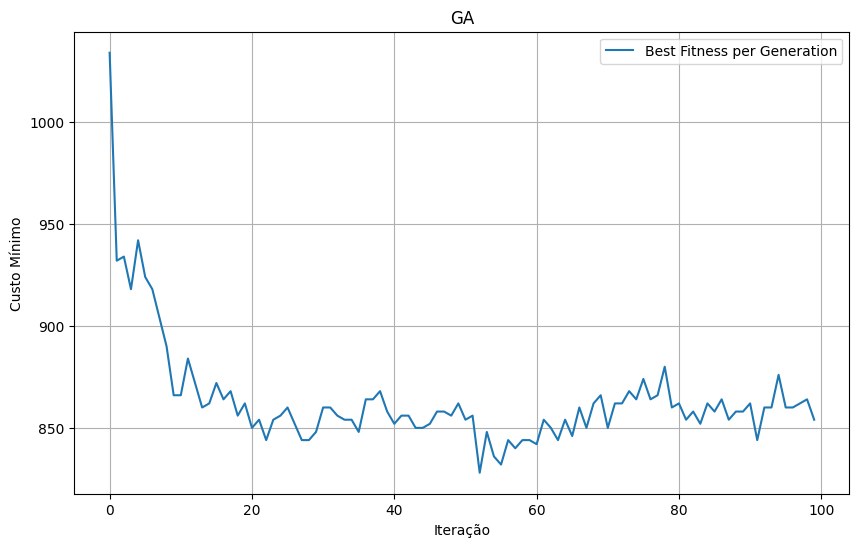

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(improvements, label='Best Fitness per Generation')
plt.xlabel('Iteração')
plt.ylabel('Custo Mínimo')
plt.title('GA')
plt.legend()
plt.grid(True)
plt.show()